# Configuração Inicial

In [52]:
import pathlib
import sys
import os
requirements_filename = 'requirements_ap6.txt'
if str(pathlib.Path().resolve().name) == "notebooks":
    root = str(pathlib.Path().resolve().parent.parent)+os.sep
    sys.path.append(root)
    requirements_path = root + 'requirements/'+requirements_filename
else:
    ! git clone --branch ap6 https://github.com/Fabio-Trindade/Eng-Aprendizado-Maquina.git
    root = str(pathlib.Path().resolve())
    src_path = root + '/Eng-Aprendizado-Maquina/'
    requirements_path = src_path + 'requirements/'+requirements_filename
    sys.path.append(root + '/Eng-Aprendizado-Maquina/')

! pip install -r $requirements_path

# Imports

In [53]:
from src.utils.util_read_file import UtilReadFile
from src.constants.KPaths import KPaths
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [54]:
root = KPaths.path_root

# Considerações Iniciais

Na [Atividade 5](https://github.com/Fabio-Trindade/Eng-Aprendizado-Maquina/blob/ap5/src/notebooks/3869-Fabio-AP5.ipynb) foi feita uma análise exploratória simples no *dataset* *breastcancerwinsconsin*, onde foi mostrado que o *dataset* contém uma coluna não nomeada e todas as outras colunas possuem atributos não nulos. Portanto, o pré-processamento do *dataset* nesta atividade apenas aplicará os passos realizados na atividade 5 para preparação do *dataset*, sem detalhamento. Além disso, vimos que utilizar PCA com 15 componentes trouxe o melhor resultado, assim, esta mesma transformação será utilizada neste trabalho.

# Criação e Manipulação do *dataset*

## Remoção das Colunas Irrelevantes 

In [55]:
df = UtilReadFile.read_csv_with_pandas(root + '/datasets/breastcancerwisconsin.csv')
df = df.drop(['id','Unnamed: 32'],axis=1)

## Transformação da Coluna *Diagnosis*

In [56]:
mapp = {'B':0,'M':1}
df['diagnosis_bin'] = df['diagnosis'].map(mapp)

In [57]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_bin
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Definindo Colunas de *features* e *labels*

In [58]:
feature_columns = list(set(df.columns)-set(['diagnosis','diagnosis_bin']))
label_column = 'diagnosis_bin'

## Aplicando PCA com 15 Componentes

### Normalizando os Dados

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])

### Reduzindo a Dimensionalidade dos Dados

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca_df = pca.fit_transform(df[feature_columns])
feature_columns = [f'PCA{i+1}' for i in range(15)]

pca_df = pd.DataFrame(data=pca_df, columns=feature_columns)
pca_df[label_column] = df[label_column]

In [61]:
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,diagnosis_bin
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103387,-0.690805,-0.601788,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157922,-0.943529,-0.653476,0.008987,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483422,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151513,1.011315,-0.933271,-0.487418,-0.168815,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539180,0.310318,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123342,-0.051723,-0.404290,0.652769,1
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108633,0.244804,0.222753,-0.192637,0.015556,-0.069984,1
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418,0.285691,0.090996,1
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,-0.178628,-0.697461,1.225195,0.218697,0.229608,1


# Aplicação dos Algoritmos

Para classificar a coluna *diagnosis*, serão utilizados os algoritmos *Random Forest* e *XGBoost* para treinar dois modelos. 

## Criação dos Algoritmos

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=300, random_state=42)

### XGBoost

In [63]:
import xgboost as xgb

xgboost = xgb.XGBClassifier(objective='binary:logistic', num_class=1, random_state=42)

## Separação dos Dados em Treino e Teste

In [64]:
df_train, df_test = train_test_split(pca_df, test_size=0.2, random_state=42)
df_train = df_train.reset_index().drop('index',axis=1)
df_test = df_test.reset_index().drop('index',axis=1)

In [65]:
df_train

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,diagnosis_bin
0,4.330003,9.202526,1.492963,0.319947,4.728171,2.215764,-2.581060,1.299153,3.784119,-2.738158,2.303942,1.949595,1.104651,0.245289,-1.061286,0
1,9.007166,0.581031,-3.134715,-0.862270,0.045722,0.725774,0.845891,-0.591540,-1.015622,1.202655,-0.859102,-0.243259,0.573833,-0.501299,-0.286303,1
2,-2.314132,3.267990,2.796224,0.565726,-0.381834,2.958284,0.210565,-0.627979,-0.232325,0.041402,0.511503,-1.010014,-0.229885,-0.794191,-0.139335,0
3,-2.582556,0.729213,-0.548143,-2.332079,-1.835265,0.140166,0.121966,0.272863,0.609655,0.350472,0.075097,0.539586,-0.105330,0.136064,-0.106218,0
4,-2.385836,2.757658,1.214086,1.794489,-3.338158,2.540784,0.746438,-0.910742,0.262430,1.319039,0.369730,0.438378,0.090629,0.335670,0.537169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.307856,7.387812,3.819086,2.133556,2.710703,-1.639758,2.428361,1.318268,-1.885126,3.192639,0.057840,0.511031,-0.335513,0.480352,0.247193,0
451,-0.749271,1.797639,-0.568366,-0.560499,-0.933096,-1.610187,-0.498350,-0.453243,0.527566,-0.459627,0.154943,-0.186822,-0.634201,0.404287,0.108690,0
452,-4.506563,-3.169273,-0.188062,0.391160,1.385207,1.138779,0.149404,0.142013,-0.429720,0.348543,0.298456,0.058027,0.356557,-0.353203,-0.082344,0
453,0.664441,0.436861,-2.680782,-0.729227,-0.027787,-1.082051,-0.001051,-0.127618,-0.009942,-0.481072,0.094721,0.239485,-0.385853,-0.312114,0.189282,1


In [66]:
df_test

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,diagnosis_bin
0,-0.781190,0.652849,-0.643657,0.214468,-0.437680,-0.160489,0.187235,-0.068190,0.533758,0.189562,0.086236,-0.052929,0.075326,0.010613,0.097243,0
1,2.704596,-4.437142,0.307345,0.488693,0.372495,-0.291801,0.283493,0.086264,0.327155,0.033346,-0.429226,0.205136,-0.372151,-0.179520,-0.292023,1
2,1.432069,-1.049604,-1.262011,0.533189,-0.626697,-0.785916,-0.621555,-0.214944,0.669595,0.131060,0.107123,0.201035,0.446399,0.160282,0.418249,1
3,-0.915804,2.479013,0.362607,0.261967,0.138472,-0.991236,-0.051203,-0.093964,-0.626973,0.109568,0.197020,0.097849,0.334178,0.240526,-0.388025,0
4,-1.665475,2.389618,1.502249,0.875951,0.484546,-1.189518,-0.677755,-0.146643,-0.291648,0.102733,0.460337,-0.872408,0.133983,0.292088,-0.534173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-2.284331,-2.466841,-0.821188,-0.040803,1.092781,-0.101014,-0.248222,-0.237064,-0.190359,-0.737435,0.131653,-0.075910,0.199087,0.497095,-0.038974,0
110,1.428168,-1.967101,1.111939,0.752911,-0.539882,-0.995563,-0.908920,1.101329,1.245873,0.092737,-0.140695,-0.769852,-0.428629,-0.164116,0.078462,1
111,-2.485883,0.460596,-0.598920,0.998718,-0.430324,-0.379622,-0.331552,-0.478411,0.579190,0.023225,0.142532,-0.131897,-0.048804,0.064663,0.225388,0
112,-0.681769,-1.135991,1.233666,-3.864500,1.428352,-1.291429,0.075334,-0.825739,-0.389515,-0.552836,-0.026180,-0.091889,0.626754,-0.126234,-0.219445,0


## Treinamento e Avaliação dos Modelos

### Funções para Avaliação dos Modelos

In [67]:
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

def calc_auc(fpr,tpr):
   return auc(fpr, tpr)

def plot_roc_curve(labels,predicted):
    fpr, tpr, thresholds = roc_curve(labels, predicted)
    auc = calc_auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa Falso Positivo')
    plt.ylabel('Taxa Verdadeiro Positivo')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    return auc

def evaluate_model(model,df_test):
    predictions = model.predict(df_test[feature_columns])
    labels = df_test[label_column]
    print(classification_report(labels, predictions))
    plot_roc_curve(labels,predictions)

### Random Forest

#### Treinamento


In [68]:
random_forest.fit(df_train[feature_columns], df_train[label_column])

RandomForestClassifier(n_estimators=300, random_state=42)

#### Avaliação

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



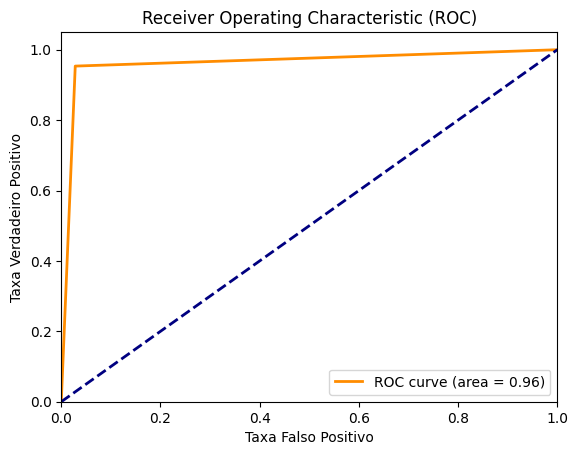

In [69]:
evaluate_model(random_forest,df_test)

### XGBoost

#### Treinamento

In [70]:
xgboost.fit(df_train[feature_columns], df_train[label_column])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=1,
              num_parallel_tree=None, ...)

### Avaliação

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



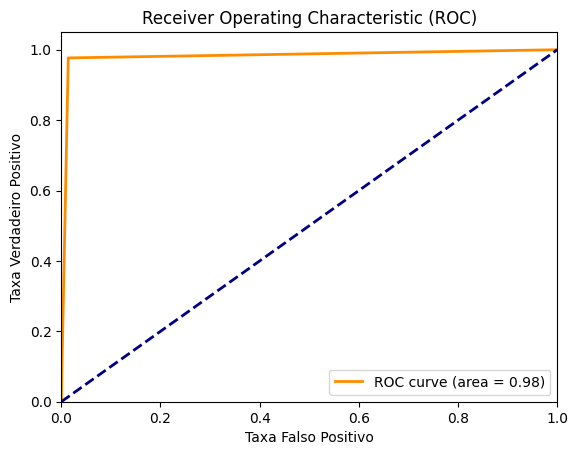

In [71]:
evaluate_model(xgboost,df_test)

### Interpretação dos Resultados

Para interpretar os resultados obtidos devemos lembrar que a classe negativa (0) é o câncer benigno e a classe positiva (1) o câncer maligno.

#### Acurácia

A acurácia calcula a taxa de acerto do modelo em relação a todas as predições realizadas.

De acordo com os resultados acima, o modelo treinado pelo XGBoost obteve uma melhor acurácia do que o treinado pelo Random Forest, uma vez que eles obteram , respectivamente, 98% e 96% de acurácia.

#### Precisão

A precisão calcula a taxa de acerto do modelo ao restringir os dados para uma determinada classe (positiva ou negativa) predita, ou seja, a taxa de acerto em relação a todas as predições feitas para uma classe.

Olhando para a classe 0, o modelo treinado pelo algoritmo Random Forest obteve 97% de precisão, ou seja, de todos os dados que o modelo classificou como benigno, ele acertou 97%. Já o modelo treinado pelo XGBoost obteve 99% de precisão.

Analisando para a classe 1, o modelo treinado por Random Forest obteve 95% de precisão, ou seja de todas as observações que o modelo classificou como maligno, ele acertou 95%, enquanto o treinado pelo XBGBoost acertou 98%. 

Dessa forma, o modelo que obteve o melhor resultado para a precisão foi o treinado pelo XGBoost. 

#### Recall e Especificidade

O recall e a especificidade são métricas que calculam a taxa de acerto do modelo ao restringir as observações, respectivamente, para as classes positiva e negativa, ou seja, calcula a taxa de acerto do modelo para todas as observações de uma respectiva classe. 

O modelo treinado pelo XGBoost obteve um recall e uma especificidade de, respectivamente, 98% e 99% , enquanto o treinado pelo Random Forest obteve 95% e 97% para as respectivas métricas.

Dessa forma, o modelo treinado pelo XGBoost obteve novamente um resultado melhor do que o modelo treinado pelo Random Forest.

#### Curva ROC e Valor AUC

Calcular a curva ROC utilizando os algoritmos XGBoost e Random Forest não irá fornecer informações importantes sobre qual treshold utilizar, uma vez que estes algoritmos treinam o modelo para retornar diretamente a classe de cada observação, e não uma probabilidade de pertencer a uma determinada classe. Por isso, as curvas acima apresentam um comportamento quase constante ao ignorar os valores extremos. No entanto, ainda pode-se analisar se um modelo é bom ou não ao analisar o valor AUC (quanto mais próximo de 1 melhor). Dessa forma, ambos os modelos obtiveram bons resutados, o que era de se esperar pelas análises e resultados apresentados e discutidos.